In the first part, the focus will be on learning with a generalised delta rule for a two-layer perceptron. The generalised delta rule is also known as the error back-propagation algorithm or simply "backprop".

## MLP Implementation

-------------

In [1210]:
import numpy as np

check the e!!!

In [1211]:
from math import e

class TwoLayerPerceptron:
    def __init__(self, learning_rate, n_hidden, mean=0.0, std_dev=1.0):
        # self.W = np.random.randn(n_hidden, 3) * std_dev + mean
        # self.V = np.random.randn(1, n_hidden) * std_dev + mean        # self.W = np.ones((n_hidden, 3))
        self.W = np.ones((n_hidden, 3))
        self.V = np.ones((1, n_hidden))

        # self.V = np.ones((1, n_hidden))
        self.learning_rate = learning_rate
        self.epochs = 0

    def activation_function(self, input):
        denominator = 1 + np.power(e, (-1) * input)
        denominator = denominator + 0.00001 * np.array(denominator==-1, dtype=int)
        return (2 / denominator) - 1
    
    def grad(self, input):
        act_input = self.activation_function(input)
        return ((1 + act_input)*(1 - act_input) / 2)
    
    def backprop_update(self, x, t):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
        hout = self.activation_function(hin)                # (n_hidden, n_samples)

        oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
        out = self.activation_function(oin)                 # (1, n_samples)
        
        # backward pass
        delta_o = (out - t) * self.grad(oin)                # element-wise product -> (1, n_samples)
        delta_h = (self.V.T @ delta_o) * self.grad(hin)     # (n_hidden, 1) x (1, n_samples) = (n_hidden, n_samples)
        delta_h = delta_h[1,:]                              # togli bias


        # weight update
        dW = (-1) * self.learning_rate * (delta_h @ x.T)    # (n_hidden, n_samples) x (n_samples, 3) = (n_hidden, 3)
        dV = (-1) * self.learning_rate * (delta_o @ hout.T)   # (1, n_samples) x (n_samples, n_hidden) = (1, n_hidden)

        self.W += dW
        self.V += dV
    
    def fit(self, x, t, n_epochs):
        for _ in range(n_epochs):
            self.backprop_update(x, t)
            self.epochs += 1

    def predict(self, x):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
        hout = self.activation_function(hin)                # (n_hidden, n_samples)

        oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
        out = self.activation_function(oin)                 # (1, n_samples)

        return out

### Part 3.1.1 - Classification of linearly non-separable data

The goal is to examine how well a two-layer perceptron trained with backprop performs in separating the two classes.

-----------

In [1212]:
import numpy as np

ndata = 100
# mA = np.array([1.0, 0.3])
mA = np.array([1.0, 0.3])

sigmaA = 0.1
mB = np.array([0.0, -0.1])
sigmaB = 0.15

# Generating data for class A
half_ndata = int(0.5 * ndata)
classA = np.zeros((2, ndata))
classA[0, :half_ndata] = np.random.randn(half_ndata) * sigmaA - mA[0]
classA[1, :half_ndata] = np.random.randn(half_ndata) * sigmaA + mA[1]
classA[0, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[0]
classA[1, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[1]

# Generating data for class B
classB = np.zeros((2, ndata))
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]

In [1213]:
classA = np.vstack((classA, - np.ones(ndata)))
classB = np.vstack((classB, np.ones(ndata)))

In [1214]:
classA[:,:5]

array([[-1.01334082, -0.93497038, -0.98286638, -0.91864143, -1.20815725],
       [ 0.31916641,  0.22847766,  0.302396  ,  0.30501366,  0.21486969],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [1215]:
classB[:,:5]

array([[-0.0087509 , -0.27126769, -0.0120533 , -0.04868744, -0.03533811],
       [-0.20003357, -0.18015947, -0.36684704, -0.23152872,  0.02130204],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

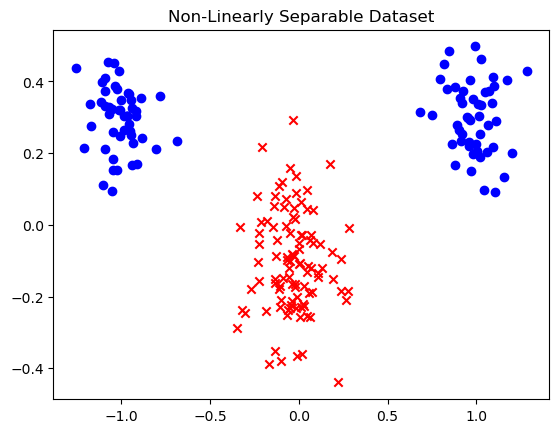

In [1216]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.show()

### Experiment 1:
Modify the number of hidden nodes and demonstrate the effect the size of the hidden layer has on the performance (both the mean squared error and the number/ratio of misclassifications). How many hidden nodes do you need to perfectly separate all the available data (if manageable at all given your data randomisation)?

---------------

bias

In [1217]:
dataset = np.vstack((np.ones(2*ndata), np.hstack((classA, classB))))
dataset[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-1.01334082, -0.93497038, -0.98286638, -0.91864143, -1.20815725],
       [ 0.31916641,  0.22847766,  0.302396  ,  0.30501366,  0.21486969],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

shuffle

In [1218]:
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.23969773, -0.06530479,  0.00287779,  0.83283352, -0.305329  ],
       [-0.18518204, -0.25215577, -0.0672928 ,  0.37781706, -0.24674402],
       [ 1.        ,  1.        ,  1.        , -1.        ,  1.        ]])

split

In [1219]:
X_train = dataset[:3,:]
y_train = dataset[3,:]

*Let's try with 4 hidden layers*

In [1220]:
perceptron_classifier = TwoLayerPerceptron(0.005, 4)

In [1221]:
mse = []
accuracies = []

In [1222]:
for e in range(500):
    perceptron_classifier.fit(X_train, y_train, 1)
    p = perceptron_classifier.predict(X_train)

    # MSE
    mse.append(np.sum((y_train - p)**2 / len(y_train)))

    # accuracy
    predictions = 2*(np.array(p > 0, dtype=int)) - 1
    accuracies.append(np.sum(predictions == y_train) / len(y_train))
    

/tmp/ipykernel_724/2422650662.py:12: RuntimeWarning: divide by zero encountered in power
  denominator = 1 + np.power(e, (-1) * input)


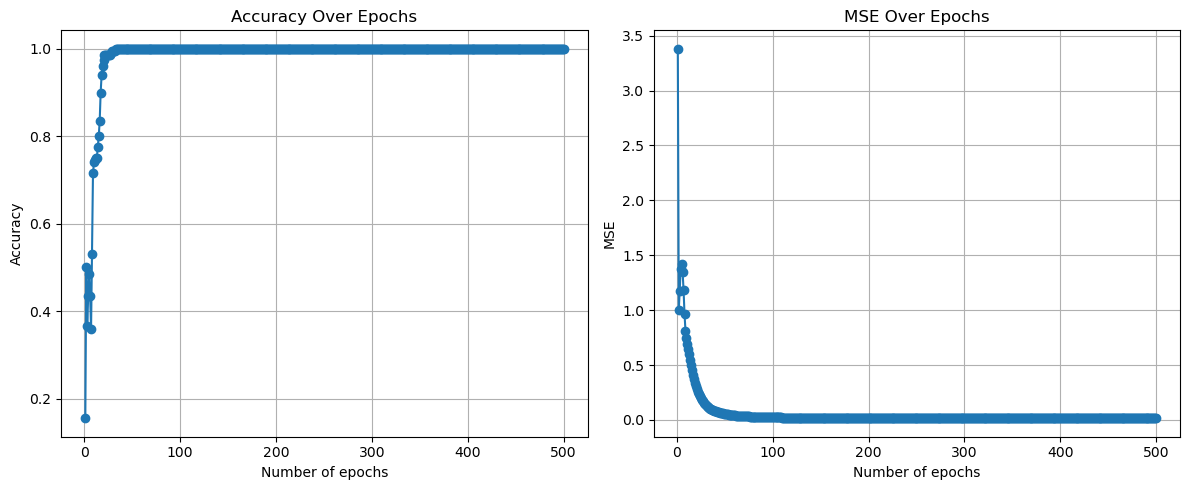

In [1223]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies) + 1)
ax1.plot(x_values, accuracies, marker='o', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse) + 1)
ax2.plot(x_values, mse, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


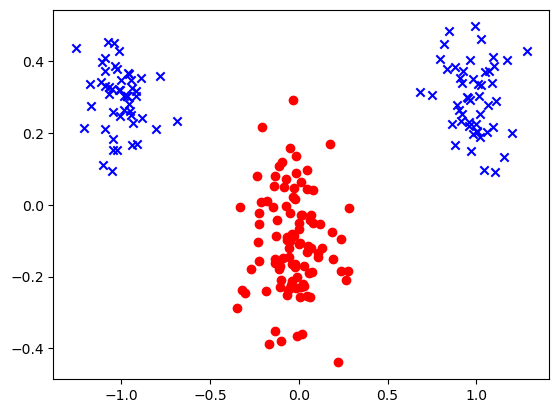

In [1224]:
p = perceptron_classifier.predict(X_train)
predictions = 2*(np.array(p > 0, dtype=int)) - 1

pred_pos = (predictions == 1)
pred_neg = (predictions == -1)

plt.scatter(X_train[1, pred_pos[0,:]], X_train[2,pred_pos[0,:]], c='r', label='a', marker='o')
plt.scatter(X_train[1, pred_neg[0,:]], X_train[2, pred_neg[0,:]], c='b', label='b', marker='x')

plt.show()

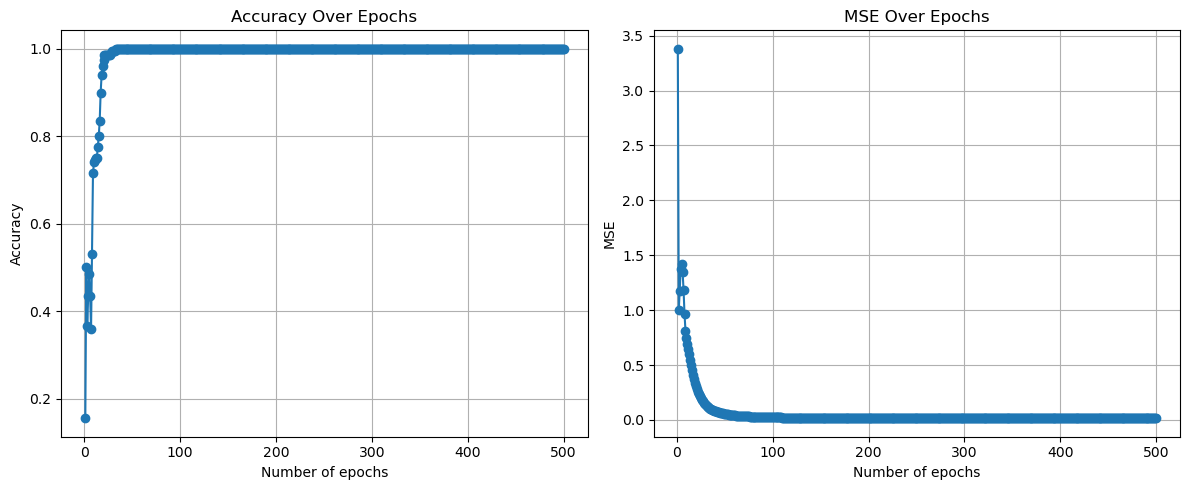

In [1225]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies) + 1)
ax1.plot(x_values, accuracies, marker='o', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse) + 1)
ax2.plot(x_values, mse, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


*How many hidden nodes do we need to perfectly classify all the points?*

In [1226]:
final_accuracies = []
final_mse = []
for n in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    pc = TwoLayerPerceptron(0.005, n)
    pc.fit(X_train, y_train, 500)
    p = pc.predict(X_train)
    
    predictions = 2*(np.array(p > 0, dtype=int)) - 1

    final_accuracies.append(np.sum(predictions == y_train) / len(y_train))
    final_mse.append(np.sum((y_train - p)**2 / len(y_train)))


print(final_accuracies)
print(final_mse)

[0.75, 0.75, 0.75, 0.5, 0.5, 0.5, 1.0, 0.985, 0.75]
[1.0396363145426921, 1.0004812813422181, 1.0016886398868508, 2.000034116770193, 2.0000481554364655, 1.9999423595662096, 0.008188894099896395, 0.05470331327127523, 1.0000527230831953]


ANSWER: it looks like there is no right number of hidden nodes to correctly classify all the points generated: the answer depends mostly on the dataset (at least with so limited amount of samples). Also we should monitor training more accurately in order to have guarantees convergence is reached.

### Experiment 2:
Then, formulate a more realistic problem where only a subset of data points is available for training a network (data you use to calculate weight updates using backprop) and the remaining samples constitute a validation dataset for probing generalisation capabilites of the network. To do that, subsample the data for training according to the following scenarios:
- random 25% from each class
- random 50% from class A
- 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

Treat the removed samples as a validation set. Make sure you do not use this hold-out set in the training process and instead you only use it to
calculate the error (mean squared error or the ratio of misclassifications) at different stages/epochs of learning to monitor the progress.

#### Scenario 1

In [1227]:
classA_train = classA[:,:75]
classA_holdout = classA[:,75:]

classB_train = classB[:,:75]
classB_holdout = classB[:,75:]

classA_train.shape, classA_holdout.shape, classB_train.shape, classB_holdout.shape

((3, 75), (3, 25), (3, 75), (3, 25))

In [1228]:
train = np.vstack((np.ones(150), np.hstack((classA_train, classB_train))))
rng.shuffle(train, axis=1)
X_train = train[:3, :]
y_train = train[3, :]

holdout = np.vstack((np.ones(50), np.hstack((classA_holdout, classB_holdout))))
rng.shuffle(holdout, axis=1)
X_holdout = holdout[:3, :]
y_holdout = holdout[3, :]

X_train.shape, y_train.shape, X_holdout.shape, y_holdout.shape

((3, 150), (150,), (3, 50), (50,))

In [1229]:
size_hidden = 4

In [1230]:
perceptron_classifier = TwoLayerPerceptron(0.001, size_hidden)

#### Training

In [1231]:
mse_train = []
accuracies_train = []

mse_validation = []
accuracies_validation = []


In [1232]:
for e in range(1000):
    perceptron_classifier.fit(X_train, y_train, 1)

    p_train = perceptron_classifier.predict(X_train)
    p_validation = perceptron_classifier.predict(X_holdout)

    if (e % 50 == 0):
        print(np.sum(np.array(p_validation > 0, dtype=int)))

    # MSE
    mse_train.append(np.sum((y_train - p_train)**2 / len(y_train)))
    mse_validation.append(np.sum((y_holdout - p_validation)**2 / len(y_holdout)))

    # accuracy
    predictions_train = 2*(np.array(p_train > 0, dtype=int)) - 1
    accuracies_train.append(np.sum(predictions_train == y_train) / len(y_train))

    predictions_validation = 2*(np.array(p_validation > 0, dtype=int)) - 1
    accuracies_validation.append(np.sum(predictions_validation == y_holdout) / len(y_holdout))



47
48
48
49
49
49
49


/tmp/ipykernel_724/2422650662.py:12: RuntimeWarning: divide by zero encountered in power
  denominator = 1 + np.power(e, (-1) * input)


50
50
50
50
50
50
50
50
50
50
50
50
50


In [1233]:
len(accuracies_train), len(accuracies_validation)

(1000, 1000)

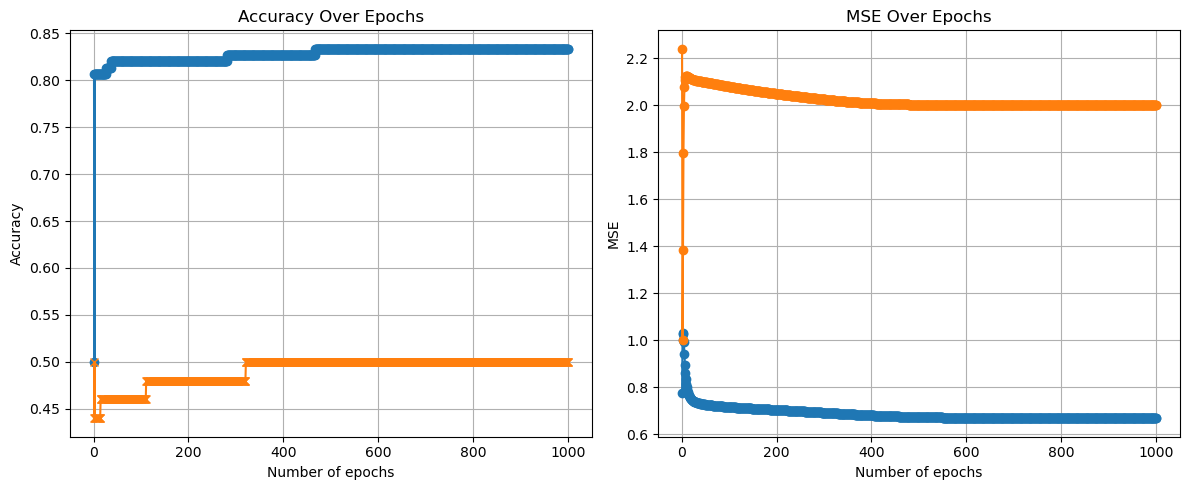

In [1234]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies_train) + 1)
ax1.plot(x_values, accuracies_train, marker='o', linestyle='-')
ax1.plot(x_values, accuracies_validation, marker='x', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse_train) + 1)
ax2.plot(x_values, mse_train, marker='o', linestyle='-')
ax2.plot(x_values, mse_validation, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Validation